# Import library

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Create Sample Dataset

In [2]:
np.random.seed(10)

df = pd.DataFrame({
    "customer_id": np.random.randint(1001, 1100, 300),
    "order_date": pd.date_range("2024-01-01", periods=300, freq="D"),
    "order_value": np.random.randint(200, 5000, 300),
    "converted": np.random.choice([0,1], 300, p=[0.3,0.7]),
    "active": np.random.choice([0,1], 300, p=[0.25,0.75])
})

df.head()

,customer_id,order_date,order_value,converted,active
0,1010,2024-01-01,4008,0,1
1,1016,2024-01-02,2158,0,1
2,1065,2024-01-03,407,0,1
3,1029,2024-01-04,4483,1,1
4,1090,2024-01-05,3804,1,1


In [3]:
df

,customer_id,order_date,order_value,converted,active
0,1010,2024-01-01,4008,0,1
1,1016,2024-01-02,2158,0,1
2,1065,2024-01-03,407,0,1
3,1029,2024-01-04,4483,1,1
4,1090,2024-01-05,3804,1,1
...,...,...,...,...,...
295,1033,2024-10-22,3380,1,0
296,1082,2024-10-23,4831,1,1
297,1014,2024-10-24,1461,1,0
298,1068,2024-10-25,4165,0,0


# KPI Calculations (CORE PART)

  Conversion Rate

In [6]:
conversion_rate = df["converted"].mean() * 100
print("Conversion Rate:", round(conversion_rate,2), "%")

Conversion Rate: 64.67 %


Churn Rate

In [7]:
churn_rate = (df["active"] == 0).mean() * 100
print("Customer Churn Rate:", round(churn_rate,2), "%")

Customer Churn Rate: 25.0 %


Average Order Value (AOV)

In [8]:
aov = df["order_value"].mean()
print("Average Order Value (AOV): ₹", round(aov,2))

Average Order Value (AOV): ₹ 2562.98


Customer Lifetime Value (CLV)

In [9]:
avg_orders = df.groupby("customer_id")["order_value"].count().mean()
clv = aov * avg_orders
print("Customer Lifetime Value (CLV): ₹", round(clv,2))

Customer Lifetime Value (CLV): ₹ 8267.69


# Funnel Analysis

In [10]:
funnel_df = pd.DataFrame({
    "Stage": ["Website Visit", "Add to Cart", "Payment Page", "Order Completed"],
    "Users": [1000, 720, 480, 350]
})

funnel_df

,Stage,Users
0,Website Visit,1000
1,Add to Cart,720
2,Payment Page,480
3,Order Completed,350


Funnel Chart

In [11]:
fig = px.funnel(
    funnel_df,
    x="Users",
    y="Stage",
    title="User Funnel Analysis"
)
fig.show()

# Cohort Analysis

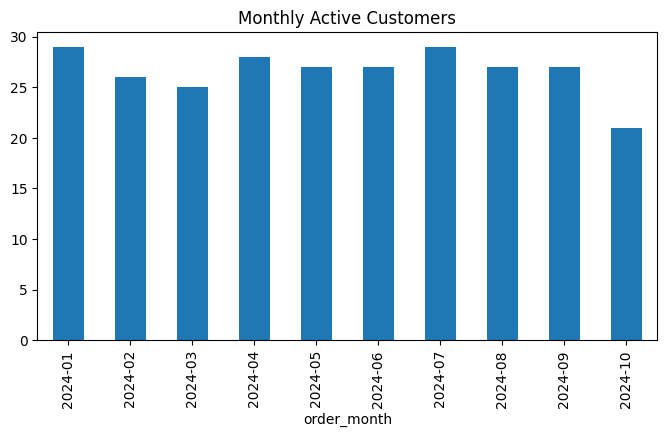

In [12]:
df["order_month"] = df["order_date"].dt.to_period("M")

cohort = df.groupby("order_month")["customer_id"].nunique()

cohort.plot(
    kind="bar",
    figsize=(8,4),
    title="Monthly Active Customers"
)
plt.show()

# Customer Segmentation

In [13]:
def segment(value):
    if value > 3000:
        return "High Value"
    elif value > 1000:
        return "Medium Value"
    else:
        return "Low Value"

df["Customer Segment"] = df["order_value"].apply(segment)
df["Customer Segment"].value_counts()

,count
Customer Segment,
High Value,130
Medium Value,110
Low Value,60


# Interactive Dashboard Chart

In [ ]:
fig = px.bar(
    df,
    x="Customer Segment",
    y="order_value",
    color="Customer Segment",
    title="Revenue by Customer Segment"
)
fig.show()